<a href="https://colab.research.google.com/github/karthickthangadurai/Guvi_Task_6/blob/main/T6_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

# **Data Analysis & Data Cleaning**

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

# **EDA**

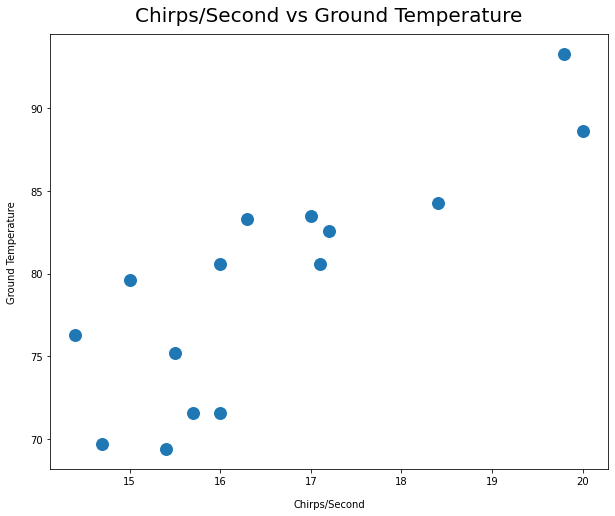

In [7]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Chirps/Second', y='Ground Temperature', data=df, s=200)
plt.title("Chirps/Second vs Ground Temperature", y=1.015, fontsize=20)
plt.xlabel("Chirps/Second", labelpad=13)
plt.ylabel("Ground Temperature", labelpad=13)
ax = plt.gca()

In [8]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


#**I. Model for predicting Ground Temprature to the given Chirps/Second** 

# **Splitting Data**

In [9]:
X = df.loc[:, ['Chirps/Second']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Ground Temperature'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [10]:
X.shape

(15, 1)

# **Scaling**

In [11]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [12]:
X_train

array([[17.1],
       [16. ],
       [17. ],
       [20. ],
       [14.4],
       [16.3],
       [15.4],
       [16. ],
       [17.2],
       [15.5]])

In [13]:
X_test

array([[18.4],
       [15.7],
       [14.7],
       [19.8],
       [15. ]])

# **Model**

In [14]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [15]:
print(regressor.intercept_) # c

29.788444097713217


In [16]:
print(regressor.coef_) # 

[2.9946365]


# **The linear regression equation for this data**

In [17]:
print("regressor.intercept:",regressor.intercept_) # c
print("regressor.coef",regressor.coef_)
print(f"Linear Regression Equation y_pred = ({regressor.coef_} * Chirps/Seconds) + {regressor.intercept_} ")

regressor.intercept: 29.788444097713217
regressor.coef [2.9946365]
Linear Regression Equation y_pred = ([2.9946365] * Chirps/Seconds) + 29.788444097713217 


In [18]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([84.88975572, 76.80423716, 73.80960066, 89.08224682, 74.70799161])

# **The original data and the equation on the chart**

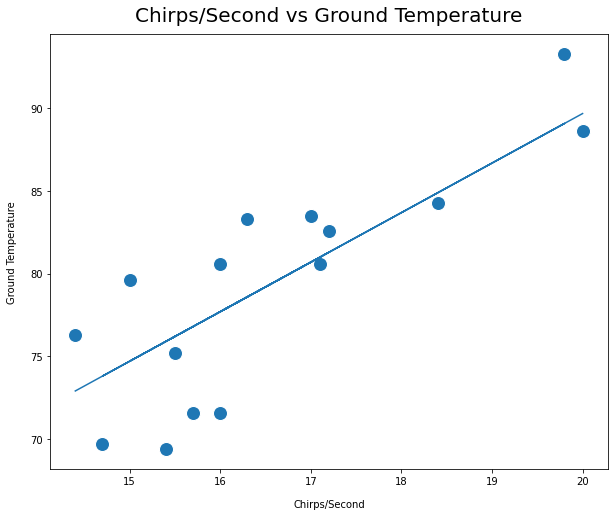

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Chirps/Second', y='Ground Temperature', data=df, s=200)
plt.title("Chirps/Second vs Ground Temperature", y=1.015, fontsize=20)
plt.xlabel("Chirps/Second", labelpad=13)
plt.ylabel("Ground Temperature", labelpad=13)
ax = plt.gca()
plt.plot(X,regressor.predict(X))

# **R2 Score**

In [20]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7685427938033862


# **Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? **

In [21]:
user = np.array(int(input("Enter The Rate Of Chirping/Seconds: "))).reshape(-1,1)
# print("Predicted Ground Temparature:", regressor.predict(scaler.transform(user)))
print("Predicted Ground Temparature:", regressor.predict(user))

Enter The Rate Of Chirping/Seconds: 18
Predicted Ground Temparature: [83.69190112]


# **II. Model For Predicting Chirping of the Cricket From the given Temparature**

# **Splitting the data**

In [22]:
X = df.loc[:, ['Ground Temperature']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Chirps/Second'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# **Scaling**

In [23]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

# **Modelling**

In [24]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

# **Linear Regression Equation**

In [25]:
print("regressor.intercept:",regressor.intercept_) # c
print("regressor.coef",regressor.coef_)
print(f"Linear Regression Equation y_pred = ({regressor.coef_} * Ground Temperature) + {regressor.intercept_} ")

regressor.intercept: 1.1677318720240901
regressor.coef [0.19353629]
Linear Regression Equation y_pred = ([0.19353629] * Ground Temperature) + 1.1677318720240901 


In [26]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([17.48284117, 15.02493028, 14.65721133, 19.22466779, 16.5732206 ])

# **Original data and equation on the chart**

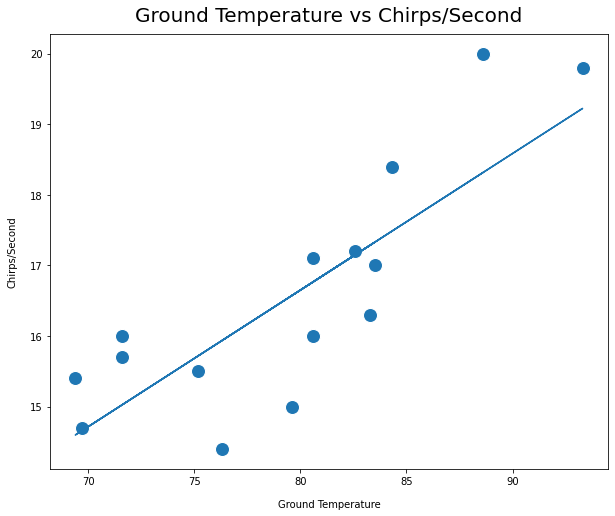

In [27]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Ground Temperature',y='Chirps/Second',  data=df, s=200)
plt.title("Ground Temperature vs Chirps/Second", y=1.015, fontsize=20)
plt.xlabel("Ground Temperature", labelpad=13)
plt.ylabel("Chirps/Second", labelpad=13)
ax = plt.gca()
plt.plot(X,regressor.predict(X))

# **R2 Score**

In [28]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7986678171941262


# **Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [29]:
user = np.array(int(input("Enter The Ground Temparature: "))).reshape(-1,1)
# print("Predicted Rate Of Chirping/Seconds:", regressor.predict(scaler.transform(user)))
print("Predicted Rate Of Chirping/Seconds:", regressor.predict(user))

Enter The Ground Temparature: 95
Predicted Rate Of Chirping/Seconds: [19.55367948]
